In [8]:
import numpy as np

from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

import pandas as pd

from sklearn.model_selection import train_test_split

# 词频统计
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
sms = pd.read_csv('./SMSSpamCollection.csv',sep = '\t',header =None)
# X -----> message
# y -----> labels
sms.columns = ['labels','message']
sms.head()
X = sms['message']
y = sms['labels']

In [6]:
bNB = BernoulliNB()

bNB.fit(X,y)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

### 使用词频统计类将文本类型的数据转换成了向量、数组、稀松矩阵

In [7]:
# string 类型的数据需要进行量化，单词为单位，统计单词出现的次数
sms.shape

(5572, 2)

In [9]:
cv = CountVectorizer()

In [10]:
X_cv = cv.fit_transform(X)
X_cv

<5572x8713 sparse matrix of type '<class 'numpy.int64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [17]:
np.save('./sm',X_cv)

In [16]:
v = cv.vocabulary_
v

{'go': 3571,
 'until': 8084,
 'jurong': 4374,
 'point': 5958,
 'crazy': 2338,
 'available': 1316,
 'only': 5571,
 'in': 4114,
 'bugis': 1767,
 'great': 3655,
 'world': 8548,
 'la': 4501,
 'buffet': 1765,
 'cine': 2061,
 'there': 7694,
 'got': 3615,
 'amore': 1082,
 'wat': 8324,
 'ok': 5538,
 'lar': 4537,
 'joking': 4342,
 'wif': 8450,
 'oni': 5567,
 'free': 3373,
 'entry': 2963,
 'wkly': 8506,
 'comp': 2178,
 'to': 7806,
 'win': 8463,
 'fa': 3100,
 'cup': 2398,
 'final': 3221,
 'tkts': 7793,
 '21st': 412,
 'may': 4959,
 '2005': 403,
 'text': 7644,
 '87121': 794,
 'receive': 6340,
 'question': 6232,
 'std': 7279,
 'txt': 7986,
 'rate': 6284,
 'apply': 1169,
 '08452810075over18': 77,
 'dun': 2815,
 'say': 6679,
 'so': 7074,
 'early': 2836,
 'hor': 3952,
 'already': 1054,
 'then': 7688,
 'nah': 5270,
 'don': 2724,
 'think': 7709,
 'he': 3805,
 'goes': 3579,
 'usf': 8130,
 'lives': 4692,
 'around': 1220,
 'here': 3856,
 'though': 7729,
 'freemsg': 3380,
 'hey': 3866,
 'darling': 2455,
 'it

In [12]:
print(X_cv)

  (0, 8324)	1
  (0, 1082)	1
  (0, 3615)	1
  (0, 7694)	1
  (0, 2061)	1
  (0, 1765)	1
  (0, 4501)	1
  (0, 8548)	1
  (0, 3655)	1
  (0, 1767)	1
  (0, 4114)	1
  (0, 5571)	1
  (0, 1316)	1
  (0, 2338)	1
  (0, 5958)	1
  (0, 4374)	1
  (0, 8084)	1
  (0, 3571)	1
  (1, 5567)	1
  (1, 8450)	1
  (1, 4342)	1
  (1, 4537)	1
  (1, 5538)	1
  (2, 77)	1
  (2, 1169)	1
  :	:
  (5570, 1802)	1
  (5570, 3489)	1
  (5570, 2905)	1
  (5570, 7099)	1
  (5570, 1794)	1
  (5570, 8120)	1
  (5570, 2606)	1
  (5570, 5367)	1
  (5570, 1451)	1
  (5570, 7674)	1
  (5570, 3323)	1
  (5570, 7089)	1
  (5570, 4642)	1
  (5570, 1097)	1
  (5570, 8371)	1
  (5570, 4245)	1
  (5570, 3805)	1
  (5570, 7806)	1
  (5570, 3373)	1
  (5570, 4114)	1
  (5571, 6548)	1
  (5571, 7938)	1
  (5571, 4253)	2
  (5571, 5276)	1
  (5571, 7806)	1


In [13]:
data = X_cv.toarray()
data.shape

(5572, 8713)

In [14]:
np.save('./data',data)

In [15]:
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### 对稀松矩阵，进行训练和学习

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size = 0.2)

In [24]:
%%time
bNB = BernoulliNB()
bNB.fit(X_train,y_train)
print(bNB.score(X_test,y_test))

0.9874439461883409
Wall time: 23.2 ms


In [20]:
mNB = MultinomialNB()
mNB.fit(X_train,y_train)
mNB.score(X_test,y_test)

0.9856502242152466

In [21]:
gNB = GaussianNB()
gNB.fit(X_train,y_train)
gNB.score(X_test,y_test)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [23]:
%%time
gNB = GaussianNB()
gNB.fit(X_train.toarray(),y_train)
print(gNB.score(X_test.toarray(),y_test))

0.9085201793721973
Wall time: 1.9 s


In [25]:
import matplotlib.pyplot as plt

In [26]:
data.shape

(5572, 8713)

(array([5.571e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

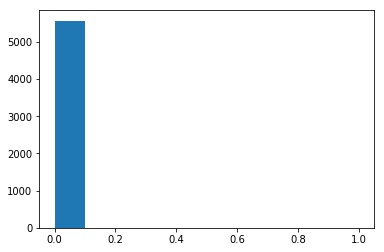

In [31]:
# 8713个特征，特征带表一个单词
# feature_extraction:特征萃取，特征的提取
plt.hist(data[:,2000])

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
'''Equivalent to :class:`CountVectorizer` followed by
:class:`TfidfTransformer`.'''
# tf term frequency - inverse document frequency
tf_idf = TfidfVectorizer()

In [35]:
X_tf_idf = tf_idf.fit_transform(X)
X_tf_idf

<5572x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [36]:
print(X_tf_idf)

  (0, 3571)	0.14787418026870422
  (0, 8084)	0.23001810878216972
  (0, 4374)	0.32647198856800297
  (0, 5958)	0.25535167546045223
  (0, 2338)	0.25283008183768235
  (0, 1316)	0.24419040033995174
  (0, 5571)	0.15602976712614566
  (0, 4114)	0.1069931616636402
  (0, 1767)	0.27580485521143805
  (0, 3655)	0.18034330636364296
  (0, 8548)	0.22083291550052703
  (0, 4501)	0.27580485521143805
  (0, 1765)	0.3116528020516887
  (0, 2061)	0.27580485521143805
  (0, 7694)	0.1555161950550194
  (0, 3615)	0.15305130991688437
  (0, 1082)	0.32647198856800297
  (0, 8324)	0.18241264829651851
  (1, 5538)	0.2718944069420321
  (1, 4537)	0.4083258549263009
  (1, 4342)	0.5236804332035243
  (1, 8450)	0.43162957585464123
  (1, 5567)	0.5466243141314314
  (2, 4114)	0.07907249752742722
  (2, 3373)	0.11311142821462249
  :	:
  (5570, 4245)	0.12207280777305733
  (5570, 8371)	0.18730237914237433
  (5570, 1097)	0.11224405842241922
  (5570, 4642)	0.159545141701127
  (5570, 7089)	0.18433209615766674
  (5570, 3323)	0.12145828902

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X_tf_idf,y,test_size = 0.2)

In [38]:
bNB = BernoulliNB()

bNB.fit(X_train,y_train)

bNB.score(X_test,y_test)

0.9757847533632287

In [39]:
X_test = ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet...No need to buy lunch for me.. I eat maggi mee..',
         'URGENT! Your mobile was awarded a £1,500 Bonus Caller Prize on 27/6/03.Hm good morning, headache anyone? :-)',
          'Hi babe its Jordan, how r u? Im home from abroad and lonely,Free entry in 2 a weekly comp for a chance to win an ipod. Txt POD to 80182 to get entry ']
X_test_tf_idf = tf_idf.transform(X_test)
X_test_tf_idf

<3x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 66 stored elements in Compressed Sparse Row format>

In [40]:
bNB.predict(X_test_tf_idf)

array(['ham', 'spam', 'spam'], dtype='<U4')